### Part III: Data Visualization

In [1]:
#Importing Libraries.
from matplotlib import pyplot 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)
pd.set_option("max_columns", None)

In [2]:
client_df=pd.read_csv('client_data.csv')
price_df=pd.read_csv('modified_price_data.csv')
df=pd.read_csv('merged_data.csv')


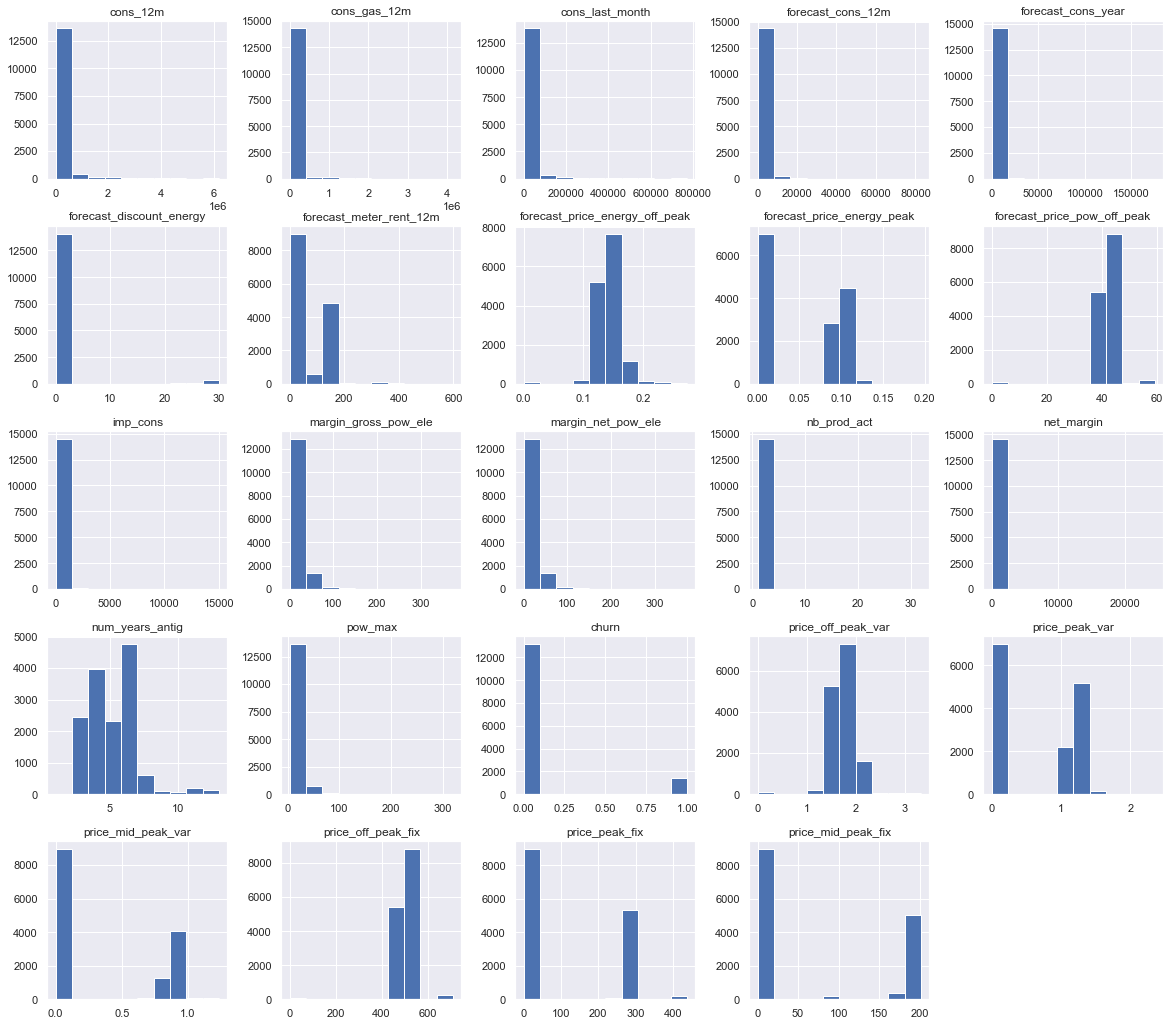

In [3]:
#general visualization of the whole dataset
df.hist(figsize=(20,18));

#### Churning

In [4]:
#Determining how many customers churned and how many did not.
churn = df.churn == 1
retention = df.churn == 0
#Adding prices to avoid duplicated rows for the same customer.


df.groupby('id')['churn'].sum().sum()

1419

In [5]:
df[retention].count()

id                                13187
channel_sales                     13187
cons_12m                          13187
cons_gas_12m                      13187
cons_last_month                   13187
date_activ                        13187
date_end                          13187
date_modif_prod                   13187
date_renewal                      13187
forecast_cons_12m                 13187
forecast_cons_year                13187
forecast_discount_energy          13187
forecast_meter_rent_12m           13187
forecast_price_energy_off_peak    13187
forecast_price_energy_peak        13187
forecast_price_pow_off_peak       13187
has_gas                           13187
imp_cons                          13187
margin_gross_pow_ele              13187
margin_net_pow_ele                13187
nb_prod_act                       13187
net_margin                        13187
num_years_antig                   13187
origin_up                         13187
pow_max                           13187


Text(0, 0.5, 'customers')

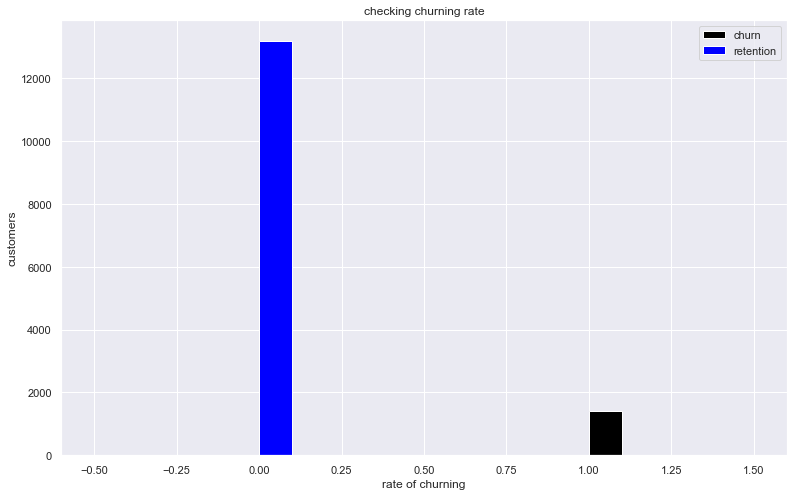

In [6]:
#Visualizing churning rate by using histogram.
plt.figure(figsize=[13,8])
df.churn[churn].hist(alpha = 1 , label='churn' ,color='black')
df.churn[retention].hist(alpha = 1 , label='retention',color='blue')
plt.legend()
plt.title('checking churning rate')
plt.xlabel('rate of churning')
plt.ylabel('customers')

- We can see that about 10% of total customers has churned.

#### Relation between the channel sales and churning.

In [7]:
#checking all the channnel sales available
df['channel_sales'].unique()

array(['foosdfpfkusacimwkcsosbicdxkicaua', 'MISSING',
       'lmkebamcaaclubfxadlmueccxoimlema',
       'usilxuppasemubllopkaafesmlibmsdf',
       'ewpakwlliwisiwduibdlfmalxowmwpci',
       'epumfxlbckeskwekxbiuasklxalciiuu',
       'sddiedcslfslkckwlfkdpoeeailfpeds',
       'fixdbufsefwooaasfcxdxadsiekoceaa'], dtype=object)

<AxesSubplot:xlabel='churn', ylabel='channel_sales'>

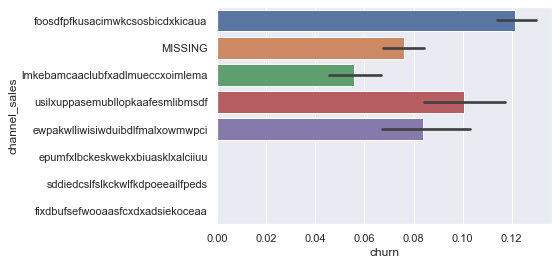

In [8]:
sns.barplot(x="churn",y="channel_sales",data=df)

In [9]:
channel_list = [(client_df['channel_sales']=='foosdfpfkusacimwkcsosbicdxkicaua').sum() ,
(client_df['channel_sales']=='MISSING').sum() ,
(client_df['channel_sales']=='lmkebamcaaclubfxadlmueccxoimlema').sum(),
(client_df['channel_sales']=='usilxuppasemubllopkaafesmlibmsdf').sum(),
(client_df['channel_sales']=='ewpakwlliwisiwduibdlfmalxowmwpci').sum(),
(client_df['channel_sales']=='sddiedcslfslkckwlfkdpoeeailfpeds').sum(),
(client_df['channel_sales']=='fixdbufsefwooaasfcxdxadsiekoceaa').sum()]
channel_list

[6754, 3725, 1843, 1375, 893, 11, 2]

> **Observation:**
- We can see that churning customers are distributed over 7 channel sales, however, churning clients are distributed over 5 of them 
- **foosdfpfkusacimwkcsosbicdxkicaua** channel sales has almost 58% of churning clients, which is normal since this channel sales has the highest number of clients.
- 19% of churning clients was from **MISSING** channel sales. We will investigate that further.

#### Contract Type

> We will be visualizing the relation between contract type and churning rate using barplot.

<AxesSubplot:xlabel='has_electricity', ylabel='churn'>

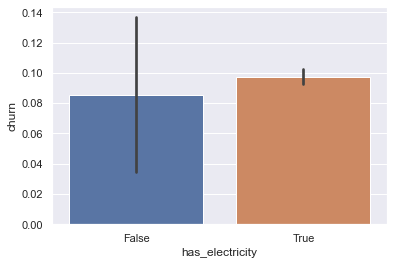

In [10]:
sns.barplot(x="has_electricity",y="churn",data=df)

<AxesSubplot:xlabel='has_both', ylabel='churn'>

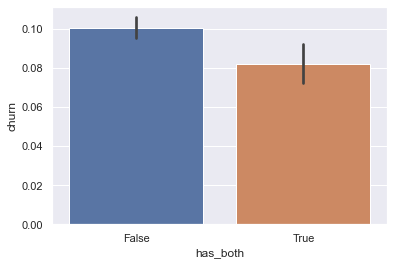

In [11]:
sns.barplot(x="has_both",y="churn",data=df)

<AxesSubplot:xlabel='has_gas', ylabel='churn'>

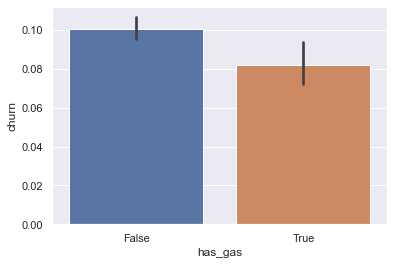

In [12]:
sns.barplot(x="has_gas",y="churn",data=df)

> **Observation:**
- Most of the clients are only having electricity contract type.
- A very small number of clients are having gas contract type.
- And so, most of the customers who are expected to churn are only consuming electricity.
    

#### Consumption

> We will be visualizing the relation between the consumption of gas and electricity in the last 12 months and in the last month and the churn using kdeplot.

<function matplotlib.pyplot.show(close=None, block=None)>

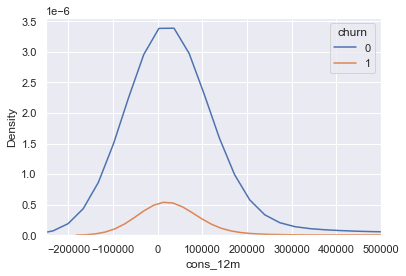

In [13]:
sns.kdeplot(x='cons_12m',hue='churn',data=df)
plt.xlim([-0.25e6,0.50e6])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

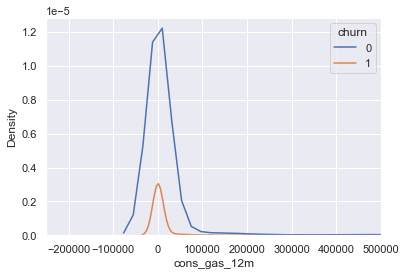

In [14]:
sns.kdeplot(x='cons_gas_12m',hue='churn',data=df)
plt.xlim([-0.25e6,0.50e6])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

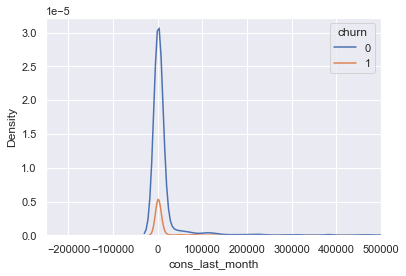

In [15]:
sns.kdeplot(x='cons_last_month',hue='churn',data=df)
plt.xlim([-0.25e6,0.50e6])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

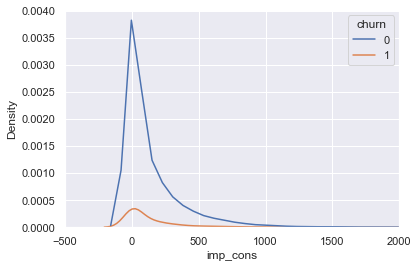

In [16]:
sns.kdeplot(x='imp_cons',hue='churn',data=df)
plt.xlim([-500,2000])
plt.show

> Outliers are values on the higher and lower end of the distribution, and as we can see the consumption data is skewed towards the higher values of the distribution. 
> we can visualise the outliers by using the boxplot to display the distribution.

C:\Users\DELL\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\DELL\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\DELL\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

<AxesSubplot:xlabel='imp_cons'>

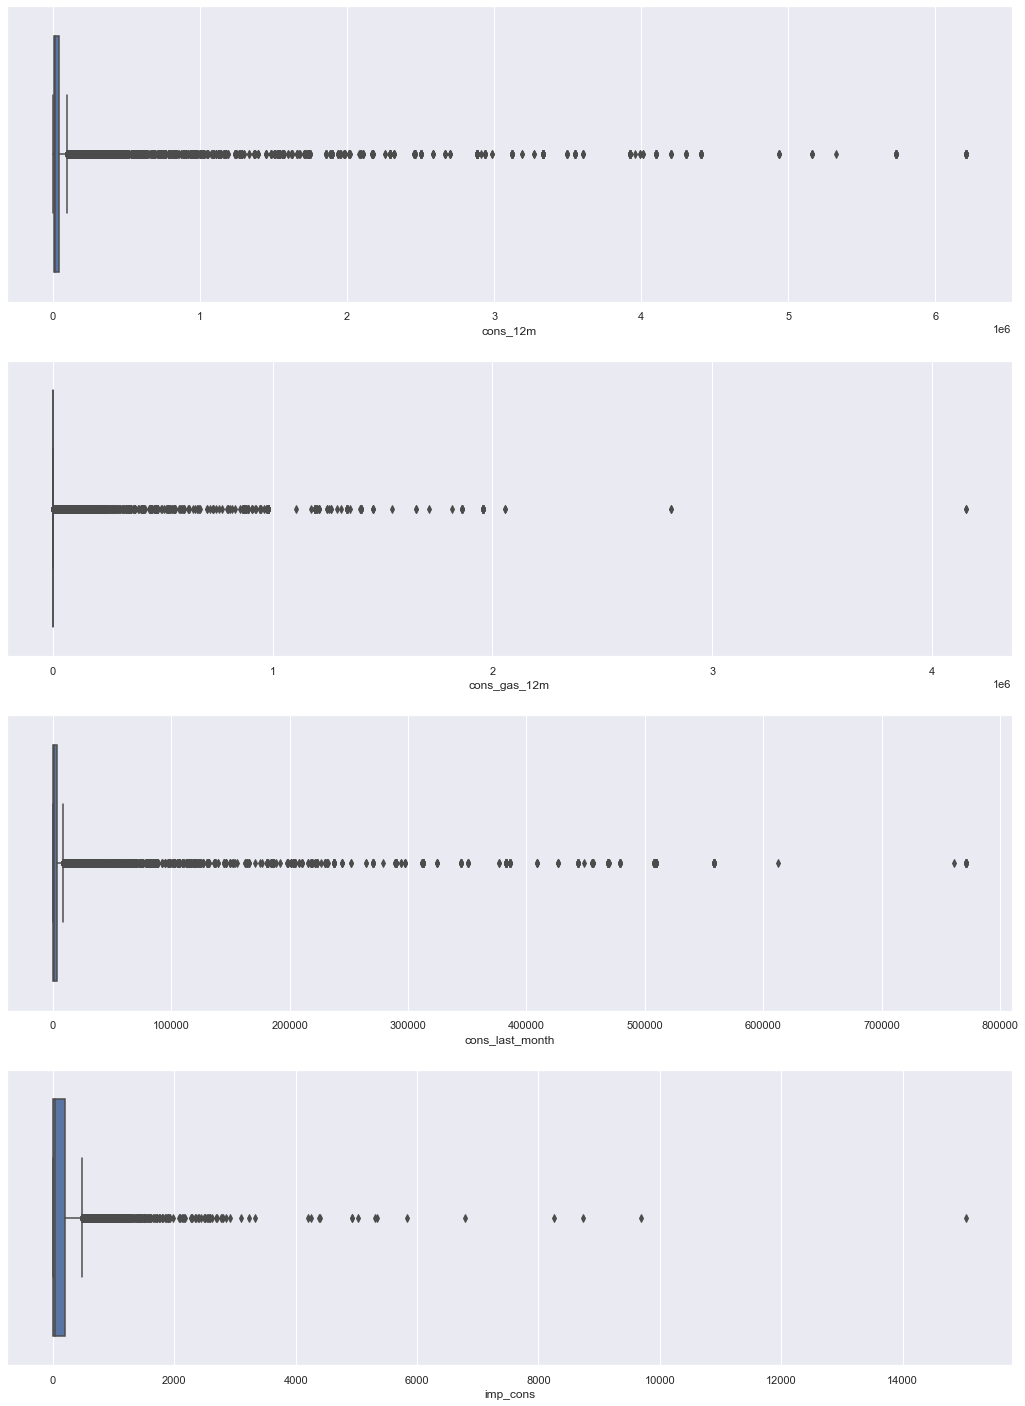

In [17]:
consumption = df[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]
fig, axs = plt.subplots(nrows=4, figsize=(18,25))

# Plot histogram
sns.boxplot(consumption["cons_12m"], ax=axs[0])
sns.boxplot(consumption["cons_gas_12m"], ax=axs[1])
sns.boxplot(consumption["cons_last_month"], ax=axs[2])
sns.boxplot(consumption["imp_cons"], ax=axs[3])

#### Forcasted Data

> We will visualize all the forcasted data in the dataset to check if it is related to the churning or not using kdeplot.

<function matplotlib.pyplot.show(close=None, block=None)>

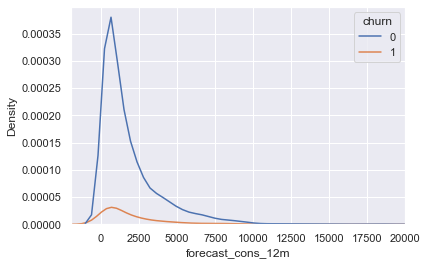

In [18]:
sns.kdeplot(x='forecast_cons_12m',hue='churn',data=df)
plt.xlim([-2000,20000])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

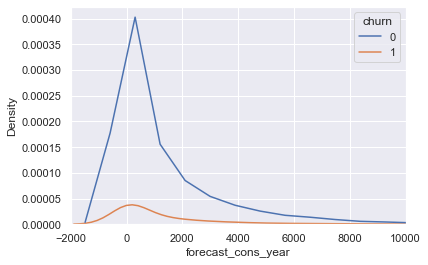

In [19]:
sns.kdeplot(x='forecast_cons_year',hue='churn',data=df)
plt.xlim([-2000,10000])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

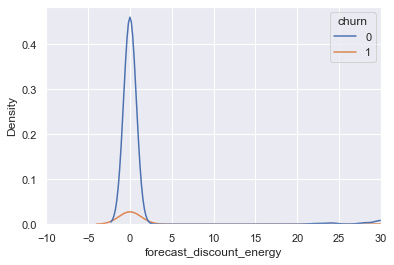

In [20]:
sns.kdeplot(x='forecast_discount_energy',hue='churn',data=df)
plt.xlim([-10,30])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

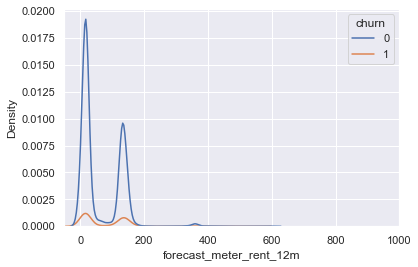

In [21]:
sns.kdeplot(x='forecast_meter_rent_12m',hue='churn',data=df)
plt.xlim([-50,1000])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

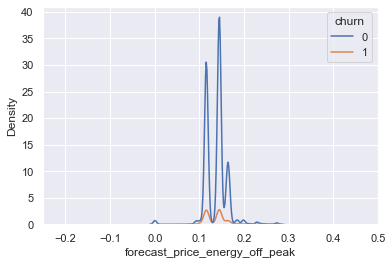

In [22]:
sns.kdeplot(x='forecast_price_energy_off_peak',hue='churn',data=df)
plt.xlim([-0.25,0.50])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

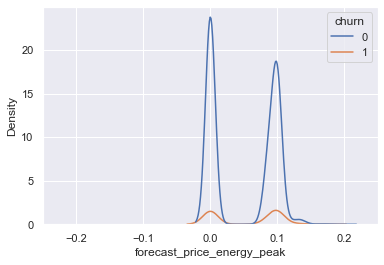

In [23]:
sns.kdeplot(x='forecast_price_energy_peak',hue='churn',data=df)
plt.xlim([-0.25,0.25])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

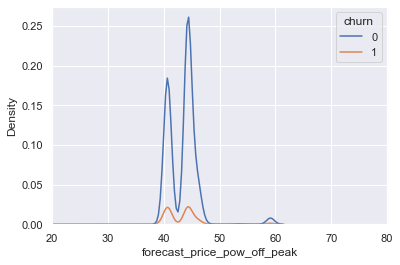

In [24]:
sns.kdeplot(x='forecast_price_pow_off_peak',hue='churn',data=df)
plt.xlim([20,80])
plt.show

>**Observation:**
- We can see that there are high skewness creating outliers that we will further deal with in feature engineering.

#### Margins 

C:\Users\DELL\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\DELL\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\DELL\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

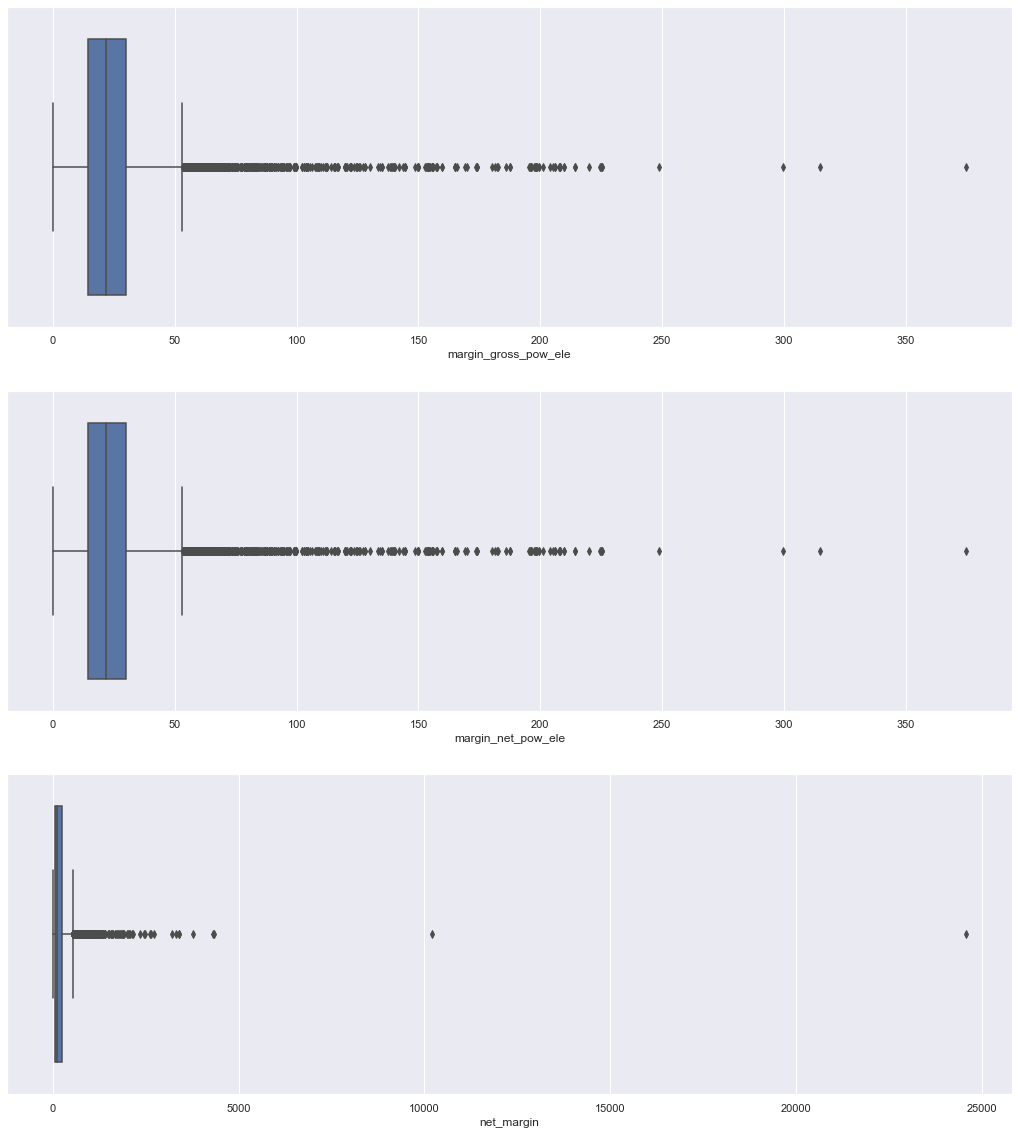

In [25]:
margin = df[['id', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'net_margin']]
fig, axs = plt.subplots(nrows=3, figsize=(18,20))

sns.boxplot(margin["margin_gross_pow_ele"], ax=axs[0])
sns.boxplot(margin["margin_net_pow_ele"],ax=axs[1])
sns.boxplot(margin["net_margin"], ax=axs[2])

axs[0].ticklabel_format(style='plain', axis='x')
axs[1].ticklabel_format(style='plain', axis='x')
axs[2].ticklabel_format(style='plain', axis='x')
plt.show()

#### Hypothesis Test


> We will need to get the average of the price features to check its relation with churning, and since we have the consumption data of 2015 we will check the average price of the year, last six months and last 3 months.

In [26]:
average_of_year= price_df.groupby(['id']).mean()
average_6_months=price_df[price_df['price_date']> '2015-06-01'].groupby(['id']).mean()
average_3_months=price_df[price_df['price_date']> '2015-10-01'].groupby(['id']).mean()

In [27]:
average_of_year

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
id,,,,,,
0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694
0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000
0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000
0010ee3855fdea87602a5b7aba8e42de,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971
00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000
...,...,...,...,...,...,...
ffef185810e44254c3a4c6395e6b4d8a,0.138863,0.115125,0.080780,40.896427,24.637456,16.507972
fffac626da707b1b5ab11e8431a4d0a2,0.147137,0.000000,0.000000,44.311375,0.000000,0.000000
fffc0cacd305dd51f316424bbb08d1bd,0.153879,0.129497,0.094842,41.160171,24.895768,16.763569


In [28]:
#Average of year 2015
average_of_year=average_of_year.rename(index=str, columns={"price_off_peak_var":"average_off_peak_var",
                                                          "price_peak_var":"average_peak_var",
                                                          "price_mid_peak_var":"average_mid_peak_var",
                                                          "price_off_peak_fix":"average_off_peak_fix",
                                                          "price_peak_fix":"average_peak_fix",
                                                          "price_mid_peak_fix":"average_mid_peak_fix"})

average_of_year["average_price1"] = average_of_year["average_off_peak_var"] + average_of_year["average_off_peak_fix"]
average_of_year["average_price2"] = average_of_year["average_peak_var"] + average_of_year["average_peak_fix"]
average_of_year["average_price3"] = average_of_year["average_mid_peak_var"] + average_of_year["average_mid_peak_fix"]

#Average of last 6 months in 2015
average_6_months=average_6_months.rename(index=str, columns={"price_off_peak_var":"average_6m_off_peak_var",
                                                          "price_peak_var":"average_6m_peak_var",
                                                          "price_mid_peak_var":"average_6m_mid_peak_var",
                                                          "price_off_peak_fix":"average_6m_off_peak_fix",
                                                          "price_peak_fix":"average_6m_peak_fix",
                                                          "price_mid_peak_fix":"average_6m_mid_peak_fix"})

average_6_months['average_6m_price1'] = average_6_months["average_6m_off_peak_var"]+average_6_months['average_6m_off_peak_fix']
average_6_months['average_6m_price2'] = average_6_months["average_6m_peak_var"]+average_6_months['average_6m_peak_fix']
average_6_months['average_6m_price3'] = average_6_months["average_6m_mid_peak_var"]+average_6_months['average_6m_mid_peak_fix']


#Average of last 3 months of 2015
average_3_months=average_3_months.rename(index=str, columns={"price_off_peak_var":"average_3m_off_peak_var",
                                                          "price_peak_var":"average_3m_peak_var",
                                                          "price_mid_peak_var":"average_3m_mid_peak_var",
                                                          "price_off_peak_fix":"average_3m_off_peak_fix",
                                                          "price_peak_fix":"average_3m_peak_fix",
                                                          "price_mid_peak_fix":"average_3m_mid_peak_fix"})

average_3_months['average_3m_price1'] = average_3_months["average_3m_off_peak_var"]+average_3_months['average_3m_off_peak_fix']
average_3_months['average_3m_price2'] = average_3_months["average_3m_peak_var"]+average_3_months['average_3m_peak_fix']
average_3_months['average_3m_price3'] = average_3_months["average_3m_mid_peak_var"]+average_3_months['average_3m_mid_peak_fix']

#Merging All into 1 dataframe
price_columns=pd.merge(average_of_year,average_6_months, on='id')
price_columns=pd.merge(price_columns,average_3_months, on='id')
price_columns.head()

,average_off_peak_var,average_peak_var,average_mid_peak_var,average_off_peak_fix,average_peak_fix,average_mid_peak_fix,average_price1,average_price2,average_price3,average_6m_off_peak_var,average_6m_peak_var,average_6m_mid_peak_var,average_6m_off_peak_fix,average_6m_peak_fix,average_6m_mid_peak_fix,average_6m_price1,average_6m_price2,average_6m_price3,average_3m_off_peak_var,average_3m_peak_var,average_3m_mid_peak_var,average_3m_off_peak_fix,average_3m_peak_fix,average_3m_mid_peak_fix,average_3m_price1,average_3m_price2,average_3m_price3
id,,,,,,,,,,,,,,,,,,,,,,,,,,,
0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,40.826071,24.524832,16.353854,0.121266,0.102368,0.073728,40.728885,24.43733,16.291555,40.850151,24.539698,16.365283,0.119906,0.101673,0.073719,40.728885,24.43733,16.291555,40.848791,24.539003,16.365274
0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000,44.531877,0.000000,0.000000,0.144687,0.000000,0.000000,44.444710,0.00000,0.000000,44.589397,0.000000,0.000000,0.143943,0.000000,0.000000,44.444710,0.00000,0.000000,44.588653,0.000000,0.000000
0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000,45.501268,0.000000,0.000000,0.202024,0.000000,0.000000,45.944710,0.00000,0.000000,46.146734,0.000000,0.000000,0.201280,0.000000,0.000000,45.944710,0.00000,0.000000,46.145990,0.000000,0.000000
0010ee3855fdea87602a5b7aba8e42de,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971,40.766185,24.486748,16.328003,0.114428,0.096080,0.069418,40.728885,24.43733,16.291555,40.843313,24.533410,16.360973,0.113068,0.095385,0.069409,40.728885,24.43733,16.291555,40.841953,24.532715,16.360964
00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,44.414856,0.000000,0.000000,0.146184,0.000000,0.000000,44.266930,0.00000,0.000000,44.413114,0.000000,0.000000,0.145440,0.000000,0.000000,44.266930,0.00000,0.000000,44.412370,0.000000,0.000000


#### Correlation between price features and churning

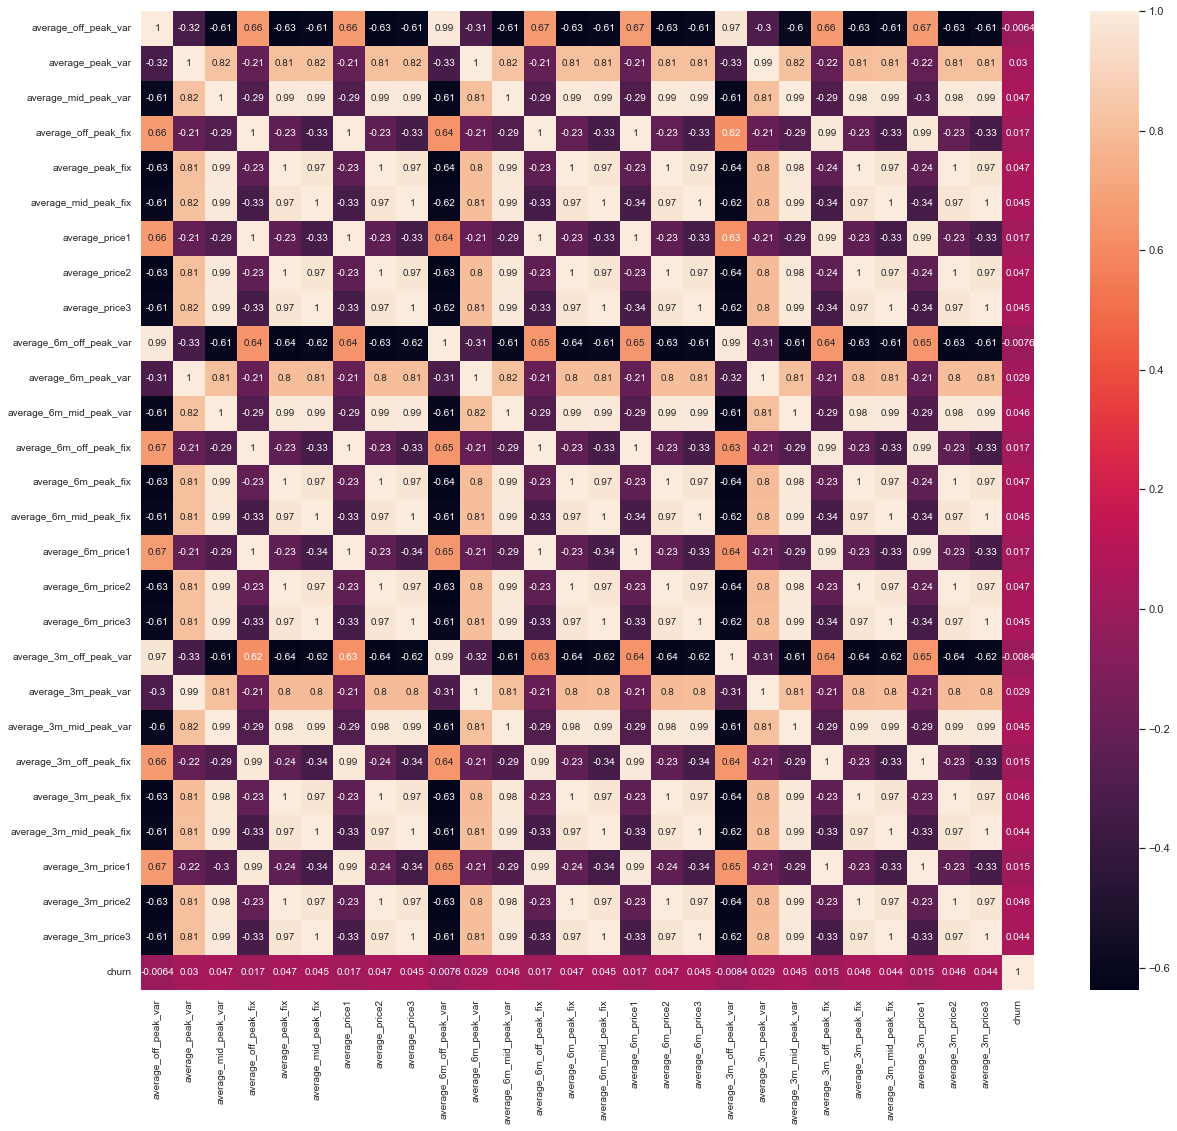

In [29]:
analysis=pd.merge(price_columns,df[['id','churn']],on='id')
correlation=analysis.corr()
plt.figure(figsize=(20,18))
sns.heatmap(correlation, xticklabels=correlation.columns.values, yticklabels=correlation.columns.values, annot = True, annot_kws={'size':10})
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

> **Observation:**
- The plot shows that there is low correlation and a weak linear relationship between churn and the price features.

In [30]:
#saving new dataset to apply feature engineering and machine learning model.
new_df=pd.merge(df.drop(columns=['churn','price_mid_peak_fix','price_peak_fix','price_off_peak_fix','price_mid_peak_var','price_peak_var','price_off_peak_var']),analysis,on='id')
new_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,has_electricity,has_both,average_off_peak_var,average_peak_var,average_mid_peak_var,average_off_peak_fix,average_peak_fix,average_mid_peak_fix,average_price1,average_price2,average_price3,average_6m_off_peak_var,average_6m_peak_var,average_6m_mid_peak_var,average_6m_off_peak_fix,average_6m_peak_fix,average_6m_mid_peak_fix,average_6m_price1,average_6m_price2,average_6m_price3,average_3m_off_peak_var,average_3m_peak_var,average_3m_mid_peak_var,average_3m_off_peak_fix,average_3m_peak_fix,average_3m_mid_peak_fix,average_3m_price1,average_3m_price2,average_3m_price3,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,True,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,False,False,0.124787,0.100749,0.066530,40.942265,22.352010,14.901340,41.067053,22.452760,14.967871,0.123598,0.098104,0.061525,41.318559,20.364442,13.576296,41.442157,20.462545,13.637821,0.131756,0.092638,0.036909,42.497907,12.218665,8.145777,42.629663,12.311304,8.182687,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,False,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,True,False,0.149609,0.007124,0.000000,44.311375,0.000000,0.000000,44.460984,0.007124,0.000000,0.147851,0.014247,0.000000,44.355820,0.000000,0.000000,44.503671,0.014247,0.000000,0.147600,0.000000,0.000000,44.444710,0.000000,0.000000,44.592310,0.000000,0.000000,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,False,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,True,False,0.170512,0.088421,0.000000,44.385450,0.000000,0.000000,44.555962,0.088421,0.000000,0.168569,0.088535,0.000000,44.444710,0.000000,0.000000,44.613279,0.088535,0.000000,0.167798,0.088409,0.000000,44.444710,0.000000,0.000000,44.612508,0.088409,0.000000,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,False,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,True,False,0.151210,0.000000,0.000000,44.400265,0.000000,0.000000,44.551475,0.000000,0.000000,0.149330,0.000000,0.000000,44.444710,0.000000,0.000000,44.594040,0.000000,0.000000,0.148586,0.000000,0.000000,44.444710,0.000000,0.000000,44.593296,0.000000,0.000000,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,False,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,True,False,0.124174,0.103638,0.072865,40.688156,24.412893,16.275263,40.812330,24.516531,16.348129,0.121266,0.102368,0.073728,40.728885,24.437330,16.291555,40.850151,24.539698,16.365283,0.119906,0.101673,0.073719,40.728885,24.437330,16.291555,40.848791,24.539003,16.365274,0


In [31]:
new_df.to_csv('eda_data.csv')